In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [28]:
wine = pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns = [c.replace(' ', '_') for c in wine.columns]

In [5]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

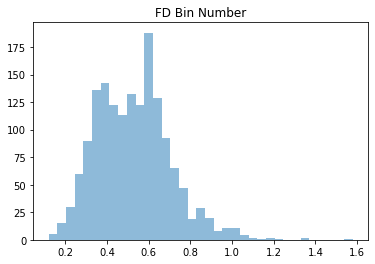

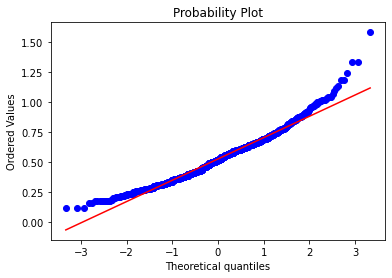

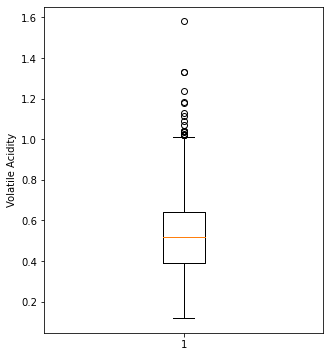

In [7]:
plt.hist(wine.volatile_acidity, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.volatile_acidity, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.volatile_acidity)
plt.ylabel("Volatile Acidity")
plt.show()

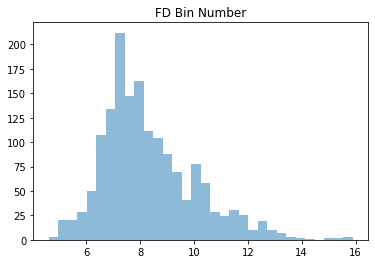

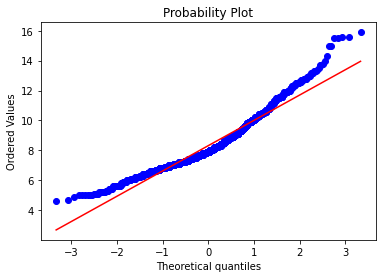

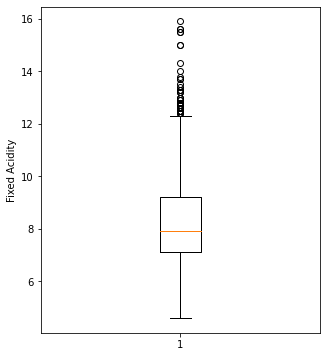

In [8]:
plt.hist(wine.fixed_acidity, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.fixed_acidity, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.fixed_acidity)
plt.ylabel("Fixed Acidity")
plt.show()

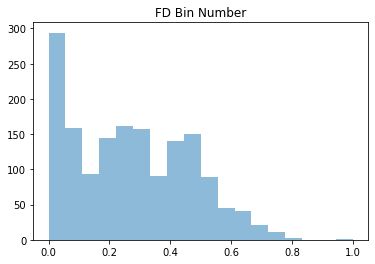

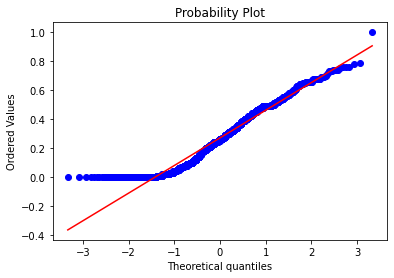

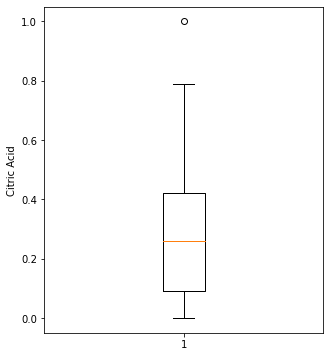

In [9]:
plt.hist(wine.citric_acid, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.citric_acid, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.citric_acid)
plt.ylabel("Citric Acid")
plt.show()

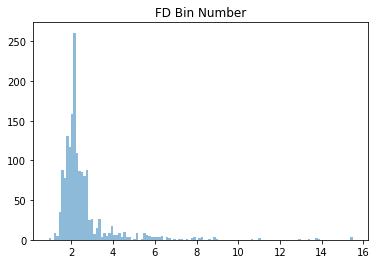

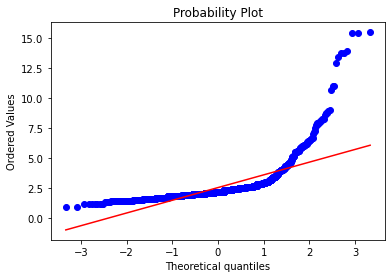

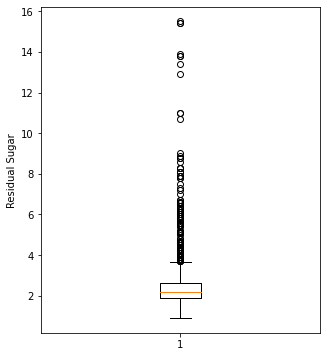

In [10]:
plt.hist(wine.residual_sugar, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.residual_sugar, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.residual_sugar)
plt.ylabel("Residual Sugar")
plt.show()

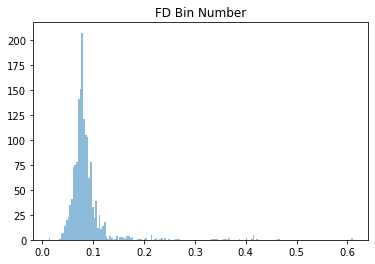

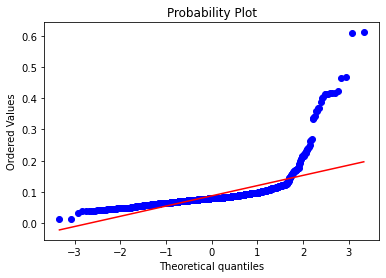

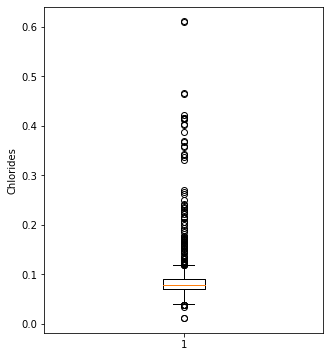

In [11]:
plt.hist(wine.chlorides, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.chlorides, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.chlorides)
plt.ylabel("Chlorides")
plt.show()

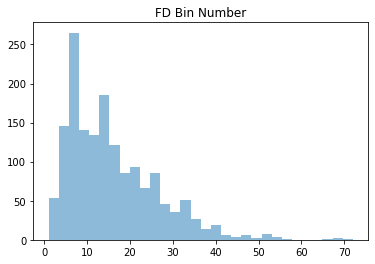

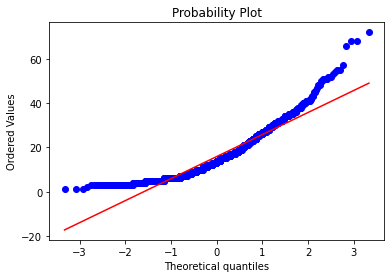

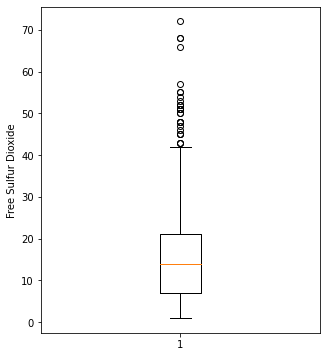

In [12]:
plt.hist(wine.free_sulfur_dioxide, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.free_sulfur_dioxide, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.free_sulfur_dioxide)
plt.ylabel("Free Sulfur Dioxide")
plt.show()

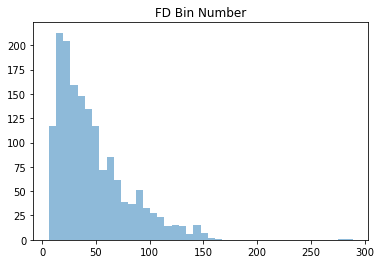

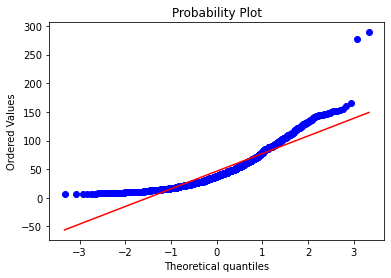

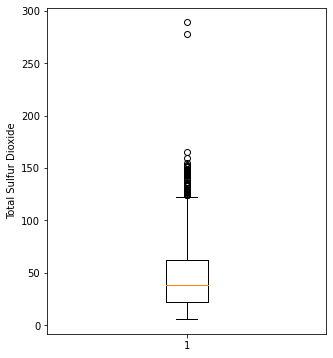

In [13]:
plt.hist(wine.total_sulfur_dioxide, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.total_sulfur_dioxide, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.total_sulfur_dioxide)
plt.ylabel("Total Sulfur Dioxide")
plt.show()

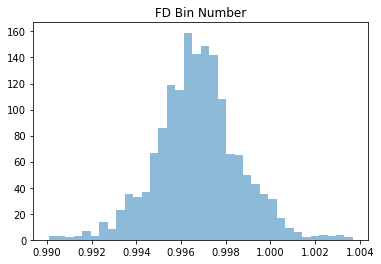

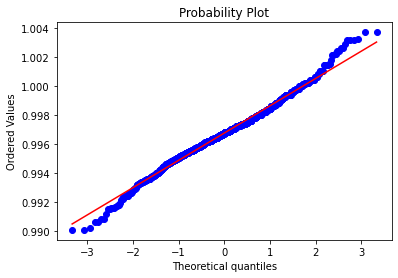

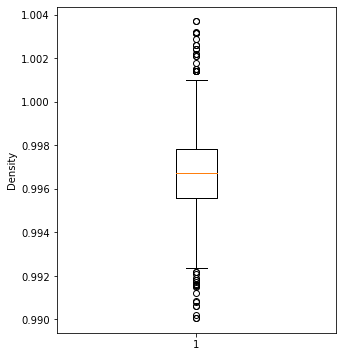

In [14]:
plt.hist(wine.density, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.density, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.density)
plt.ylabel("Density")
plt.show()

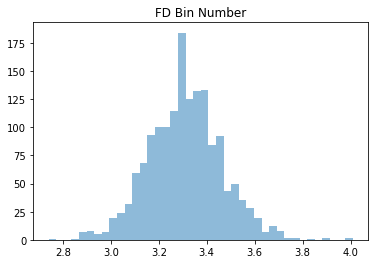

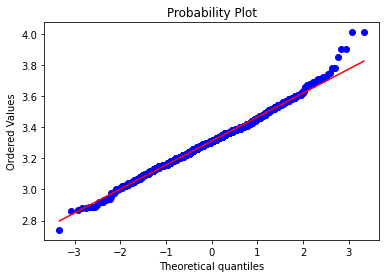

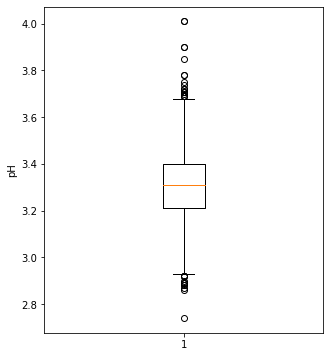

In [15]:
plt.hist(wine.pH, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.pH, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.pH)
plt.ylabel("pH")
plt.show()

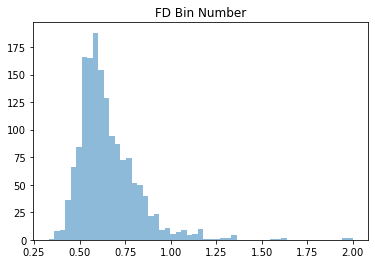

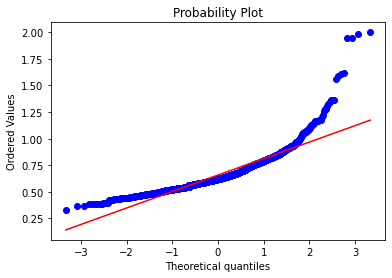

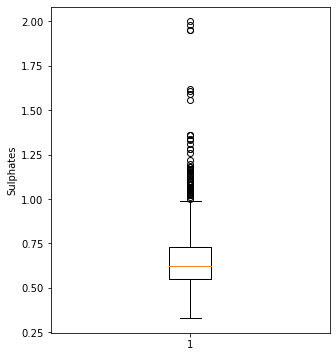

In [16]:
plt.hist(wine.sulphates, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.sulphates, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.sulphates)
plt.ylabel("Sulphates")
plt.show()

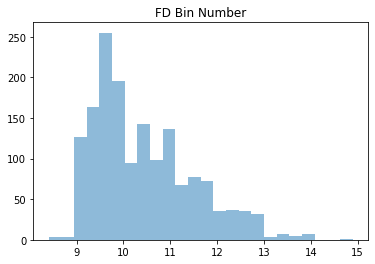

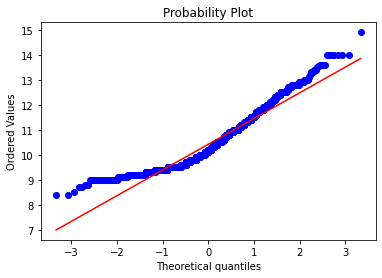

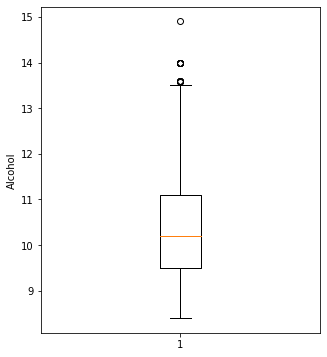

In [17]:
plt.hist(wine.alcohol, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.alcohol, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.alcohol)
plt.ylabel("Alcohol")
plt.show()

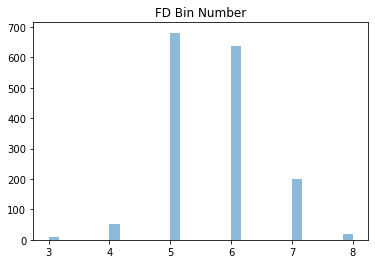

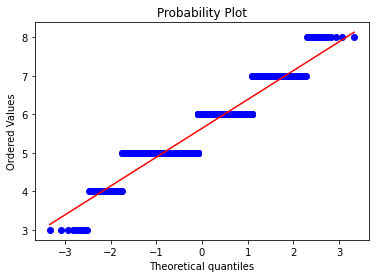

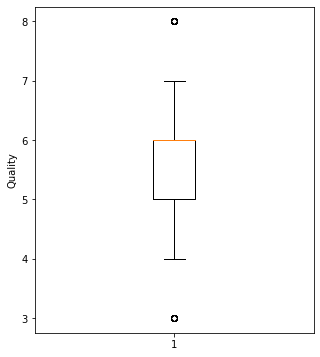

In [18]:
plt.hist(wine.quality, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.quality, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.quality)
plt.ylabel("Quality")
plt.show()

In [19]:
mr_mod = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=wine)
mr_fit = mr_mod.fit()
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.79e-145
Time:                        16:16:45   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652 

In [20]:
x = wine.iloc[:,0:11]
y = wine['quality']

  0%|          | 0/50 [00:00<?, ?it/s]

6 attributes confirmed important: ['total_sulfur_dioxide', 'chlorides', 'alcohol', 'volatile_acidity', 'pH', 'sulphates']
4 attributes confirmed unimportant: ['residual_sugar', 'citric_acid', 'density', 'fixed_acidity']
1 tentative attributes remains: ['free_sulfur_dioxide']


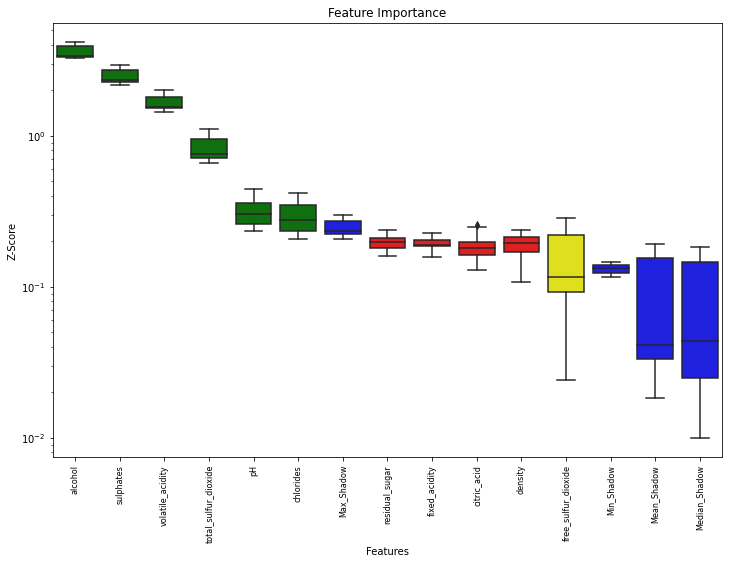

In [21]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

In [22]:
kf = KFold(n_splits=5)

mse = []
for train_index, test_index in kf.split(wine):
    results = smf.ols('quality ~ alcohol', wine.iloc[train_index]).fit()
    s = ((wine.iloc[test_index]['quality'] - results.predict(wine.iloc[test_index])**2)).mean()
    mse.append(s)

In [23]:
mse

[-24.23238953219302,
 -25.68452649362523,
 -26.37068136780895,
 -27.783748066131277,
 -27.166364870678898]

In [24]:
reg_mse = smf.ols('quality ~ alcohol', data = wine)
results = reg_mse.fit()
(results.resid**2).mean()

0.5039840256714576

In [25]:
x = wine[['alcohol']]
y = wine[['quality']]
regr = LinearRegression()
scores = cross_val_score(regr,x,y, cv=5,scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

5-Fold CV MSE Scores: [-0.47127101 -0.53293457 -0.50785203 -0.496387   -0.54658904]


In [33]:
x = wine[['alcohol']]
y = wine[['quality']]
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
regr = linear_model.LinearRegression()
scores = cross_val_score(regr,x,y,cv=5,scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

MAE: 0.5230974814995661
MSE: 0.4386573651787201
RMSE: 0.6623121357628291
5-Fold CV MSE Scores: [-0.68649182 -0.73002368 -0.71263737 -0.70454737 -0.7393166 ]
